<a href="https://colab.research.google.com/github/ayush9h/PyTorch-DeepLearning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sympy

In [1]:
from sympy import *
import numpy as np

x = symbols('x')

def base_eqn(x):
  return cos(2 * pi * x) + x**2
def derv(x):
  return diff(base_eqn(x)), x

In [2]:
print(derv(x))

(2*x - 2*pi*sin(2*pi*x), x)


In [3]:
def fx(x):
  return np.cos(2*np.pi*x) + x**2

def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x) + 2 * x

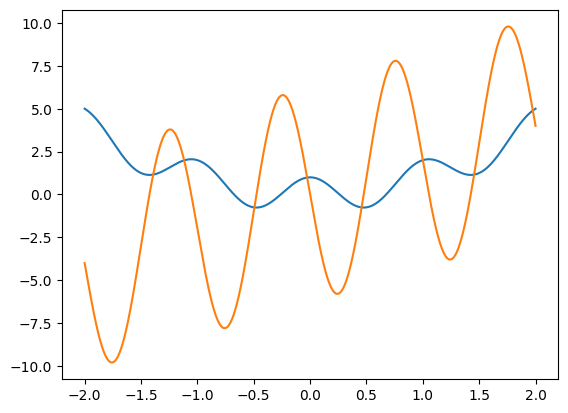

In [4]:
X = np.linspace(-2,2,2001)

import matplotlib.pyplot as plt

plt.plot(X, fx(X))
plt.plot(X, deriv(X))

In [13]:
# localmin = np.random.choice(X,1)
localmin = np.array([0])

learning_rate = 0.01
training_epochs = 100

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad


print(localmin)


# This is called vanishing gradient problem(zero learning)

[0.]
